# import torch

In [1]:
import mnist_train as mt

In [2]:
import torch
from torch import optim
torch.__version__

'1.10.1+cu113'

# GPU check

In [3]:
print("torch.cuda.is_availible(): ", torch.cuda.is_available())
print("torch.cuda.get_device_name(): ", torch.cuda.get_device_name())

torch.cuda.is_availible():  True
torch.cuda.get_device_name():  NVIDIA GeForce GTX 1650 with Max-Q Design


In [4]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Download MNIST dataset

## What is MNIST dataset?
> MNIST 데이터베이스 (Modified National Institute of Standards and Technology database)는  
손으로 쓴 숫자들로 이루어진 대형 데이터베이스이며,   
다양한 화상 처리 시스템을 트레이닝하기 위해 일반적으로 사용된다.   
이 데이터베이스는 또한 기계 학습 분야의 트레이닝 및 테스트에 널리 사용된다.  
>  
> https://ko.wikipedia.org/wiki/MNIST_데이터베이스


> `Dataset` 은 샘플과 정답(label)을 저장하기 위한 목적으로 사용됩니다.  
https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

# local에 데이터가 없으면 다운로드 받음
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)


In [6]:
print(train_data)
print("----")
print(train_data[0])

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
----
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.

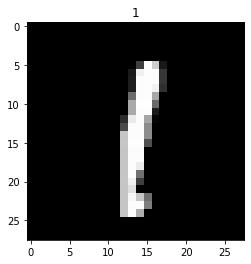

In [7]:
import random
idx = random.randrange(0, len(test_data)-1)

img, label = train_data[idx]
mt.plot_train_data(img, label)

# Plot multiple train_data

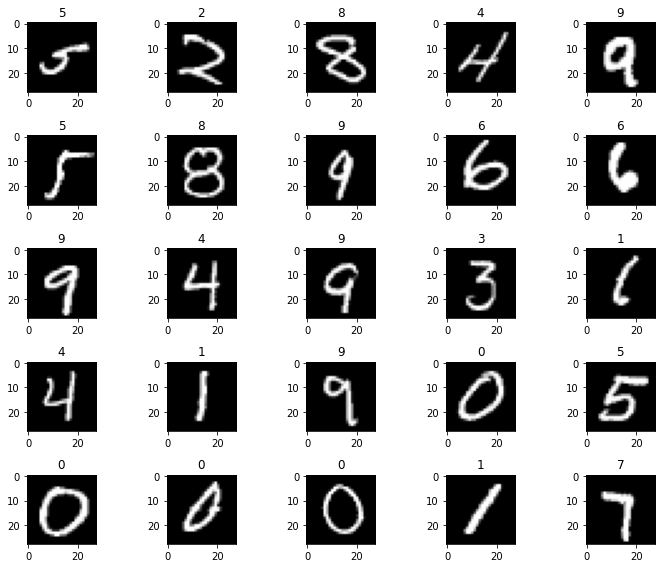

In [8]:
mt.plot_multiple_train_data(train_data=train_data)

# Dataloader

> DataLoader 는 Dataset 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.  
Dataset 은 데이터셋의 특징(feature)을 가져오고  
하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다.  
모델을 학습할 때, 일반적으로 샘플들을 “미니배치(minibatch)”로 전달하고,  
매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고,  
Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.
>
> DataLoader 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다  
https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

In [9]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, ),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1a5d3c22c40>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1a5d3c22fa0>}

# Defile Model

In [10]:
import torch.nn as nn
import torch.nn.functional as F
class NN(nn.Module):
    
    def __init__(self, in_features, out_features):
        super(NN, self).__init__()
        
        self.nn = nn.Sequential(
            nn.Linear(in_features, 28*30),      # layer1 - input
            nn.ReLU(),         
            
            nn.Linear(28*30, 30*40),            # layer2 - hidden
            nn.ReLU(),
            
            nn.Linear(30*40, 30*40),            # layer3 - hidden
            nn.ReLU(),
            
            nn.Linear(40*30, 30*28),            # layer4 - hidden
            nn.ReLU(),

            nn.Linear(30*28, out_features),     # layer5 - out
        )
        
    def forward(self, x):

        out = self.nn(x) 
        out = F.softmax(out, dim=1)
        
        return out

In [11]:
model = NN(28*28, 10)
model.to(device)
print(model)

NN(
  (nn): Sequential(
    (0): Linear(in_features=784, out_features=840, bias=True)
    (1): ReLU()
    (2): Linear(in_features=840, out_features=1200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1200, out_features=1200, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1200, out_features=840, bias=True)
    (7): ReLU()
    (8): Linear(in_features=840, out_features=10, bias=True)
  )
)


In [12]:
#!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 840]         659,400
              ReLU-2                  [-1, 840]               0
            Linear-3                 [-1, 1200]       1,009,200
              ReLU-4                 [-1, 1200]               0
            Linear-5                 [-1, 1200]       1,441,200
              ReLU-6                 [-1, 1200]               0
            Linear-7                  [-1, 840]       1,008,840
              ReLU-8                  [-1, 840]               0
            Linear-9                   [-1, 10]           8,410
Total params: 4,127,050
Trainable params: 4,127,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 15.74
Estimated Total Size (MB): 15.81
-------------------------------------

# model test (before training)

> gt: 8
> image shape: torch.Size([1, 784])
< out: [[0.10164553 0.10110553 0.09583282 0.10085318 0.09910039 0.09911994
  0.09863458 0.10277461 0.10019095 0.10074241]]
< predicted: 7
< confidence: 0.10277460515499115


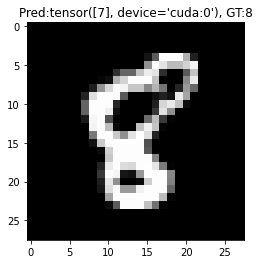

In [13]:
mt.show_sample_predict_nn(model, device, test_data)

# Train model

In [14]:
from torch.autograd import Variable
import time

def train(model, loaders, num_epochs, loss_func, optimizer, train_loss_list:list, test_loss_list:list):

    total_step = len(loaders['train'])      # num of batch
    
    for epoch in range(num_epochs):
        loss_dict = {
            'train': 0.,
            'test': 0.
        }        
        start_time = time.time()
        
        for phase in ['train', 'test']:
            
            if phase == 'train':
                model.train()
            else:
                model.eval()
        
            # batch size단위로 학습하기
            for i, (images, labels) in enumerate(loaders[phase]):

                images = images.to(device, dtype=torch.float32)
                labels = labels.to(device)

                # iteration
                loss = 0    # iteration loss
                for idx in range(len(images)):
                    image = images[idx]
                    image = image.view(1, -1)
                    output = model(image)
                    loss =+ loss_func(output, labels.unsqueeze(1)[idx])

                loss_dict[phase] += loss.item()
                
                if phase == 'train':
                    optimizer.zero_grad()     # clear gradients for this training step               
                    loss.backward()           # backpropagation, compute gradients         
                    optimizer.step()          # apply gradients                 

                    # batch 100번 마다 로그 찍기
                    if (i+1) % 100 == 0:
                        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.6f}' 
                               .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
        
                
        train_loss = loss_dict['train'] / len(loaders['train']) 
        test_loss = loss_dict['test'] / len(loaders['test']) 

        # test_loss가 가장 작을때의 weight 를 저장
        if epoch == 0:
            min_loss = test_loss
            best_model = model.state_dict()
        elif test_loss < min_loss:
            min_loss = test_loss
            best_model = model.state_dict()
                        
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        duration = time.time() - start_time
        print(f"Epoch [{epoch+1}/{num_epochs}] summary, train_loss:{train_loss:8.8f}, "\
              f"test_loss:{test_loss:8.8f} duration: {duration:.1f}s")

    # test_loss가 가장 작을때의 weight 로 복원
    model.load_state_dict(best_model)
        
    return model, train_loss_list, test_loss_list
        

In [15]:
model = NN(28*28, 10)
model = model.to(device)
loss_func = nn.CrossEntropyLoss()   
optimizer = optim.Adam(model.parameters(), lr = 0.0001)   

train_loss_list = []
test_loss_list = []

In [16]:
model, train_loss_list, test_loss_list = train(model, loaders, 10, loss_func, optimizer, train_loss_list, test_loss_list)

Epoch [1/10], Step [100/600], Loss: 2.305830
Epoch [1/10], Step [200/600], Loss: 2.344708
Epoch [1/10], Step [300/600], Loss: 2.301682
Epoch [1/10], Step [400/600], Loss: 2.028367
Epoch [1/10], Step [500/600], Loss: 2.328629
Epoch [1/10], Step [600/600], Loss: 2.261261
Epoch [1/10] summary, train_loss:2.11862401, test_loss:1.94466977 duration: 60.0s
Epoch [2/10], Step [100/600], Loss: 2.216212
Epoch [2/10], Step [200/600], Loss: 2.460945
Epoch [2/10], Step [300/600], Loss: 2.349615
Epoch [2/10], Step [400/600], Loss: 2.418989
Epoch [2/10], Step [500/600], Loss: 2.443286
Epoch [2/10], Step [600/600], Loss: 2.454610
Epoch [2/10] summary, train_loss:1.84827327, test_loss:1.85904739 duration: 69.2s
Epoch [3/10], Step [100/600], Loss: 2.460090
Epoch [3/10], Step [200/600], Loss: 1.461150
Epoch [3/10], Step [300/600], Loss: 1.465063
Epoch [3/10], Step [400/600], Loss: 1.472433
Epoch [3/10], Step [500/600], Loss: 1.475172
Epoch [3/10], Step [600/600], Loss: 1.461150
Epoch [3/10] summary, trai

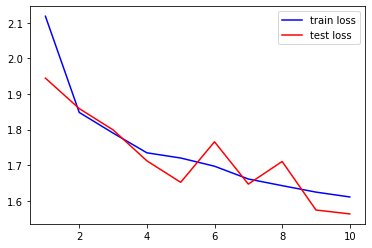

In [17]:
mt.draw_loss(train_loss_list, test_loss_list)

# Evaluate

In [18]:
from tqdm import tqdm
def evaluate():
    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in tqdm(loaders['test']):
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device)
            for idx in range(len(images)):
                image = images[idx].view(1,-1)
                output = model(image)  
                pred = torch.max(output, 1)[1].item()
                total += 1
                if pred == labels[idx].item():
                    correct+=1
                
        print(f'Test Accuracy of the model on the 10000 test images: {correct/total*100:.2f}%')


In [19]:
evaluate()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.11it/s]

Test Accuracy of the model on the 10000 test images: 88.80%


# Evaluation data sampling

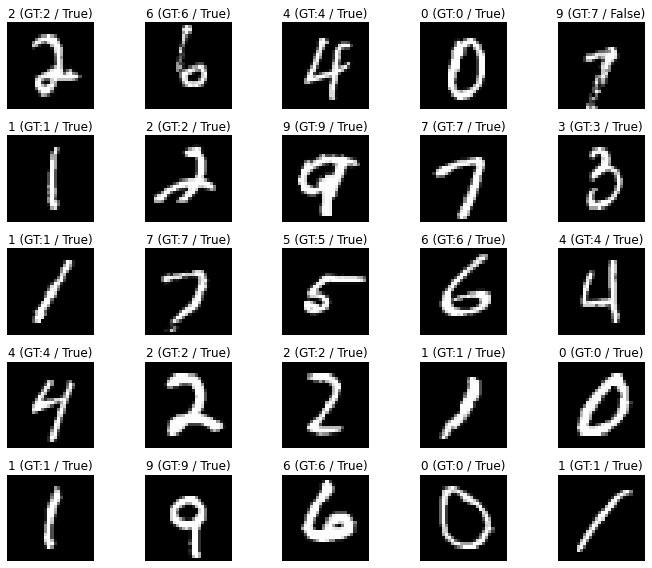

In [20]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    model.eval()
    sample_idx = np.random.randint(len(test_data), size=(1,)).item()
    img, gt = test_data[sample_idx]
    img = img.to(device)

    predicted = model(img.view(1,-1))
    label = torch.argmax(predicted)

    figure.add_subplot(rows, cols, i)
    plt.title(f"{label} (GT:{gt} / {gt==label})")
    plt.axis("off")
    plt.imshow(img.view(28,28).cpu(), cmap="gray")

plt.tight_layout()
plt.show()

# Test

> gt: 3
> image shape: torch.Size([1, 784])
< out: [[1.2239348e-11 1.2427366e-12 1.2112255e-06 9.9999869e-01 6.0846053e-15
  1.6157668e-07 2.5532660e-14 7.0256155e-11 2.5514820e-08 2.8283138e-12]]
< predicted: 3
< confidence: 0.9999986886978149


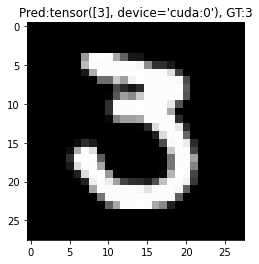

In [21]:
mt.show_sample_predict_nn(model, device, test_data)